# Personal Loan Conversion - Supervised Learning Project

### Data Description:
The file Bank.xls contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

### Domain:
Banking

### Context:
This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with minimal budget.

### Attribute Information:
- ID : Customer ID
- Age : Customer's age in completed years
- Experience : #years of professional experience
- Income : Annual income of the customer (In Dollars)
- ZIP Code : Home Address ZIP code.
- Family : Family size of the customer
- CCAvg : Avg. spending on credit cards per month (In Dollars)
- Education : Education Level.
    - Undergrad
    - Graduate
    - Advanced/Professional
- Mortgage : Value of house mortgage if any. (In Dollars)
- Personal Loan : Did this customer accept the personal loan offered in the last campaign?
- Securities Account : Does the customer have a securities account with the bank?
- CD Account : Does the customer have a certificate of deposit (CD) account with the bank?
- Online : Does the customer use internet banking facilities?
- Credit card : Does the customer use a credit card issued by Thera Bank?

### Learning Outcomes:
- Exploratory Data Analysis
- Preparing the data to train a model
- Training and making predictions using a classification model
- Model evaluation

### Objective:
The classification goal is to predict the likelihood of a liability customer buying personal loans.

## First lets import all the necessary libraries. 

- Pandas: For reading the data, and performing several EDA tasks.
- Numpy: To perform some mathematical operations during the EDA task.
- Matplotlib and Seaborn: For the purpose of visualisation.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Reading the given data.

In [2]:

loan = pd.read_csv('Bank_Personal_Loan_Modelling.csv')

In [3]:
loan.shape

(5000, 14)

### Observation 1: We can observe that the data given to us has 5000 rows and 14 columns. Let us see further what are these columns and the type of data present in each column.

In [4]:
loan.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [5]:
loan.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [6]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


### Observation 2: We can see that we have 13 columns of integer type and 1 column of float type. All the columns do not have any null values present in them

In [7]:
loan.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


## Observation 3: Study the data distribution in each attribute, share your findings (Task 1)

**ID**: categorical, qualitative variable. 0 being the lowest id number and 5000 being the highest id number.

**Age**: numerical, quantative variable. 23 being the youngest age and 67 being the oldest age. We can notice that the mean and the 50% are very close implying that age is normally distributed.

**Experience**: numerical, quantative variable. We can see that the minimum exp is -3 which looks like an error in the dataset and the maximum exp is 43. 

**Income**: numerical, quantative variable. Minimum being 8,000 dollars and maximum being 224,000 dollars. We can see the median is less than the mean implying the distribution is skewed towards right(positive skew).

**ZIP Code**: categorical, qualitative, nominal variable.

**Family**: categorical, qualitative variable. Family size ranges from 1 to 4.

**CCAvg**: numerical, quantative variable. The average spending on credit card ranges from 0 dollars to 10K dollars.We can also see that the mean is greater than the median (50% value) implying the graph is skewed towards right (positive skew).

**Education**: categorical variable where 1: Undergrad, 2: Graduate, 3: Advanced/ professional. It is also an ordinal variable.

**Mortgage**: numerical, quantative variable. The minimum mortgage being 0 dollars and the maximum 635,000 dollars. As we can see that the mean of the mortgage is way larger than the median of the mortgage, the graph for mortgage is highly skewed towards right.

**Personal Loan**: categorical. Where 0 means did not accept personal loan and 1 means accepted personal loan. This column is also the target variable.

**Securities Account**: categorical. If the customer has a securities account with the bank then 1 else 0.

**CD Account**: categorical. If the customer has a certificate of deposit (CD) account with the bank then 1 else 0.

**Online**: categorical. If the customer uses internet banking then 1 else 0.

**CreditCard**: categorical. If the customer use a credit card then 1 else 0.

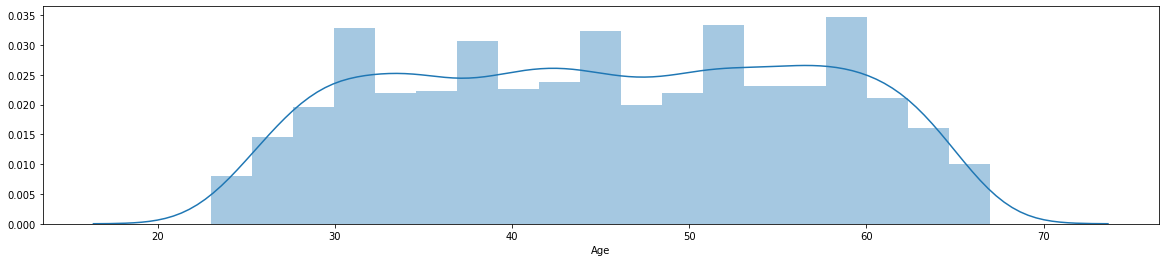

In [8]:
fig_dims = (20, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.distplot(loan['Age'], ax=ax);

### Observation 4: As we can see the column age is normally distributed. The age of range 30-60 holds the majority of the account in the bank

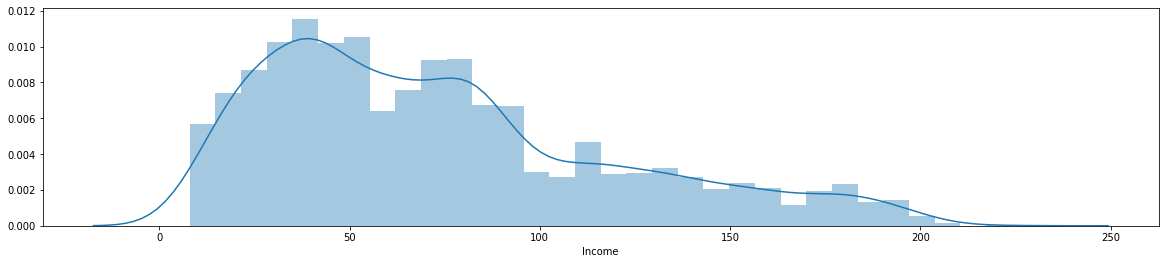

In [9]:
fig_dims = (20, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.distplot(loan['Income'], ax=ax);

### Observation 5: The income is skewed towards the right. Implying, lesser people earn more than 100K dollars. Majority of the people earn from 8K-90K dollars.

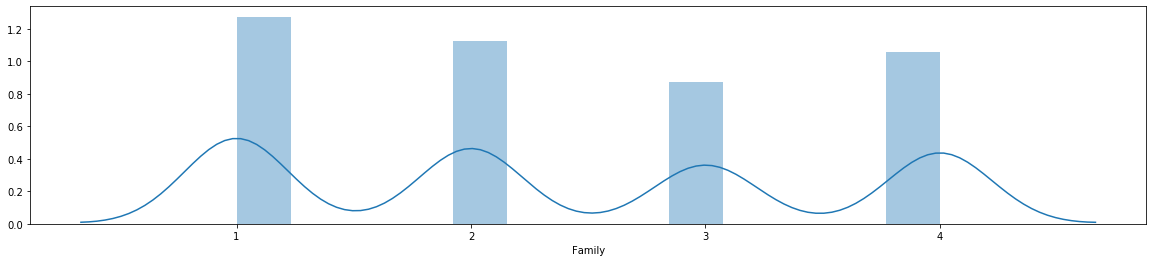

In [10]:
fig_dims = (20, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.distplot(loan['Family'],ax=ax);

### Observation 6: We have family ranging from 1 to 4. Most of the account holders appear to be single. 

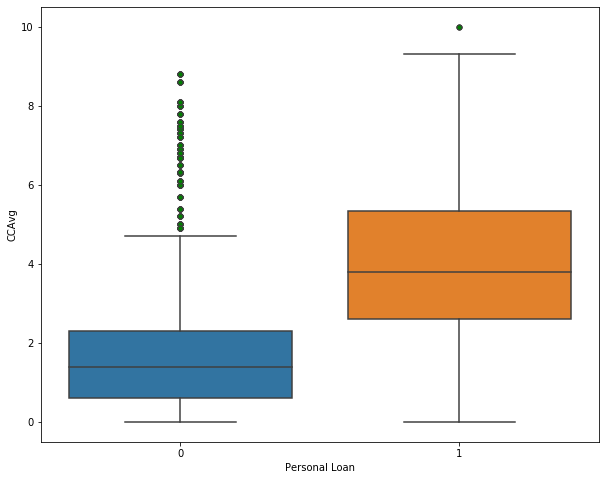

In [11]:
fig_dims = (10, 8)
fig, ax = plt.subplots(figsize=fig_dims)
green_circle = dict(markerfacecolor='g', marker='o')
sns.boxplot(loan['Personal Loan'],loan['CCAvg'],ax=ax, flierprops = green_circle);

### Observation 7: From the above graph we can see that the people who have more than 2K dollars average credit card expenditure, they are more inclined to take up the personal loan.

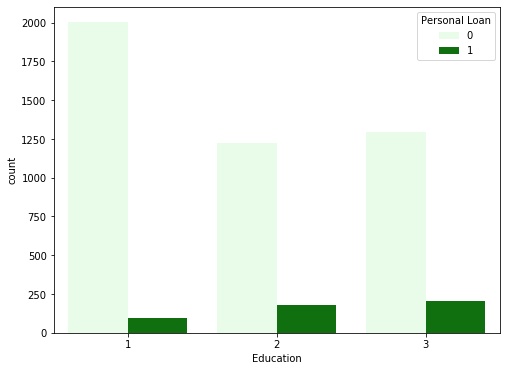

In [12]:
fig_dims = (8, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(loan['Education'],hue=loan['Personal Loan'],ax=ax, color ='g');

### Observation 8: Education is categorise into 3 parts:
- 1: Undergraduation
- 2: Graduate
- 3: Advanced/ Professional

### We can see that people who are graduated or have an advanced or professional degree are more inclined to take up the personal loan.

## As we saw in observation 1, that experience contains values in negative. Which looks like an error. Let's look into this and replace the negative value(s) with the mean value of the column.

In [13]:
loan.Experience.value_counts()

 32    154
 20    148
 9     147
 5     146
 23    144
 35    143
 25    142
 28    138
 18    137
 19    135
 26    134
 24    131
 3     129
 14    127
 16    127
 30    126
 34    125
 27    125
 17    125
 29    124
 22    124
 7     121
 8     119
 6     119
 15    119
 10    118
 33    117
 13    117
 11    116
 37    116
 36    114
 21    113
 4     113
 31    104
 12    102
 38     88
 39     85
 2      85
 1      74
 0      66
 40     57
 41     43
-1      33
-2      15
 42      8
-3       4
 43      3
Name: Experience, dtype: int64

In [14]:
loan['Experience'].replace([-1,-2,-3],loan['Experience'].mean(),inplace=True)

In [15]:
loan.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.328688,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.253009,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,0.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,11.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.104600,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


### From the above table we can confirm that Experience column no longer holds any negative value as the minimum value shown is 0.

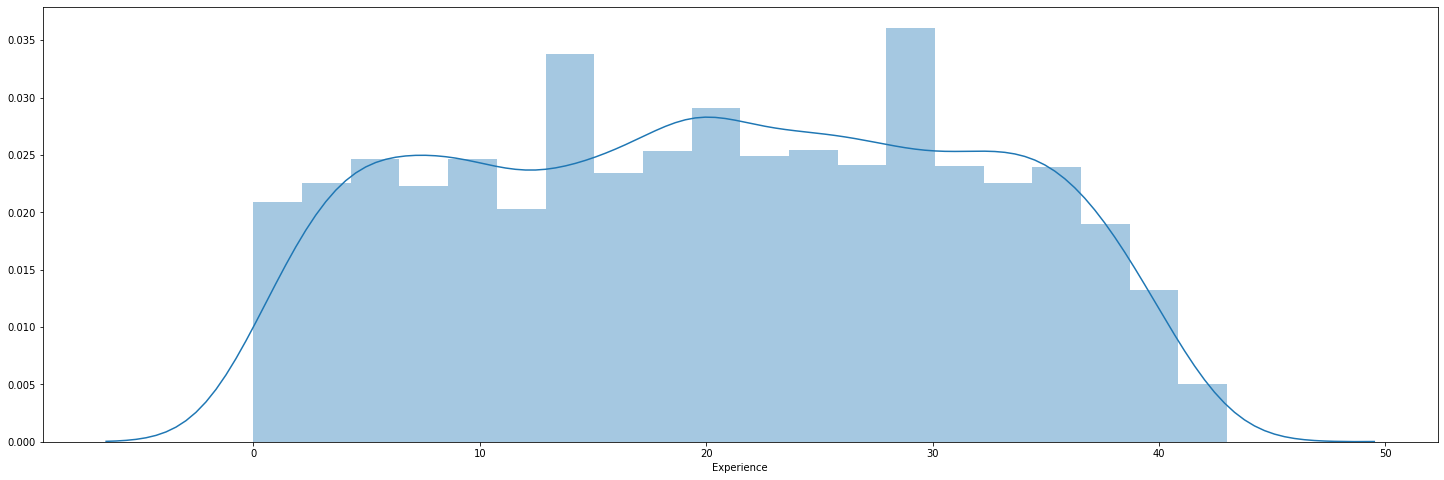

In [16]:
fig_dims = (25, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.distplot(loan['Experience'],ax=ax);

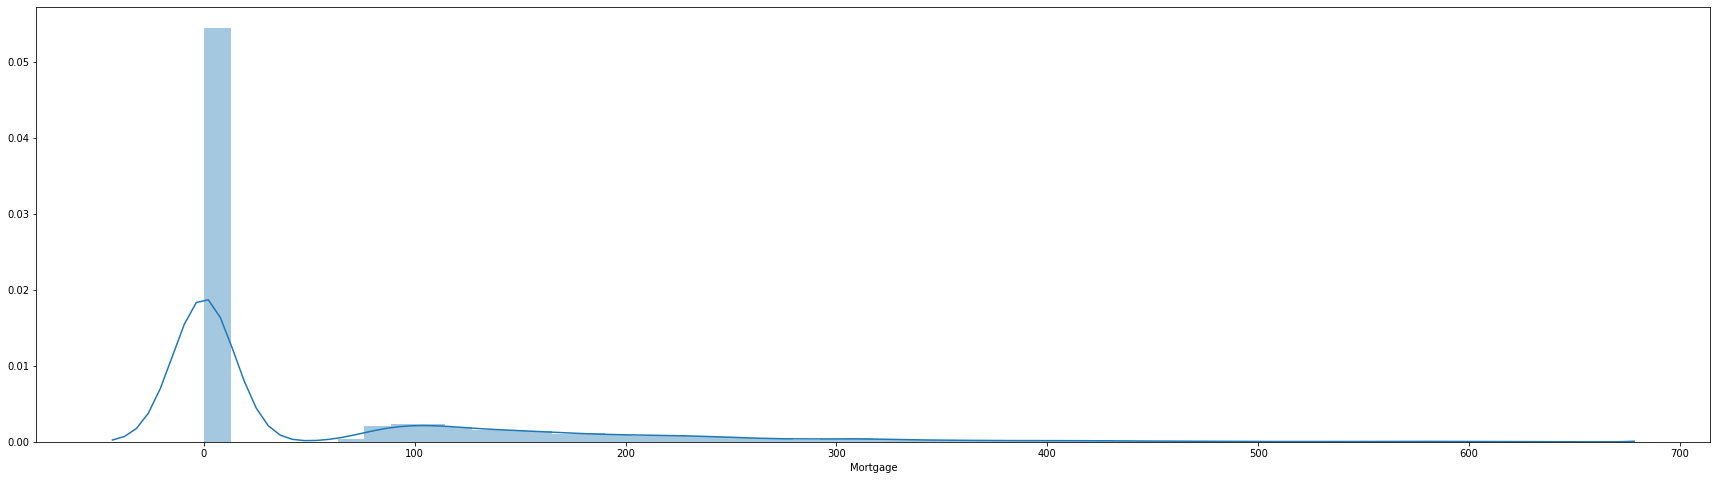

In [17]:
fig_dims = (30, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.distplot(loan['Mortgage'],ax=ax);

## Distribution of the target variable:

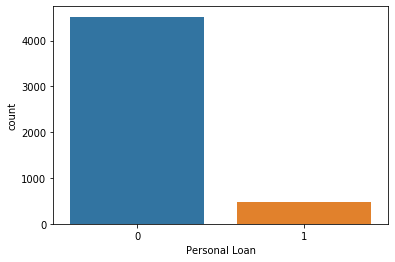

In [18]:
#distribution of the target variable
sns.countplot(loan['Personal Loan'])

In [19]:
display(loan['Personal Loan'].value_counts())

0    4520
1     480
Name: Personal Loan, dtype: int64

### We have only 480 out of 5000 who converted to personal loan.

In [20]:
display(loan['Personal Loan'].value_counts(normalize = True)*100)

0    90.4
1     9.6
Name: Personal Loan, dtype: float64

In [21]:
loan.corr()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008473,-0.009344,-0.017695,0.013432,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.977008,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.009344,0.977008,1.000000,-0.049054,-0.028488,-0.045488,-0.048708,0.018097,-0.013378,-0.014045,-0.000462,0.005502,0.013455,0.008833
Income,-0.017695,-0.055269,-0.049054,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,0.013432,-0.029216,-0.028488,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.045488,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.048708,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.018097,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.013378,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.024801,-0.007726,-0.014045,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


### Let us look into the correlation of each column with our target variable 'Personal Loan'

In [22]:
corr_with_pl=[]
indep_cols = loan.drop('Personal Loan', axis = 1).columns

for cols in indep_cols:
    corr_with_pl.append(loan['Personal Loan'].corr(loan[cols]))

display(pd.DataFrame([indep_cols, corr_with_pl], index = ['Independent Column', 'Corr with Personal Loan']).transpose())

,Independent Column,Corr with Personal Loan
0,ID,-0.0248012
1,Age,-0.00772562
2,Experience,-0.0140447
3,Income,0.502462
4,ZIP Code,0.000107376
5,Family,0.061367
6,CCAvg,0.366889
7,Education,0.136722
8,Mortgage,0.142095
9,Securities Account,0.0219539


### From the above table we can see that columns :
- ID
- Age
- Experience
- Zip Code
- Online
- Creditcard

### have less than 0.01 correlation with personal loan. Therefore, we will be dropping them going ahead for our modelling and displaying of pairplot.

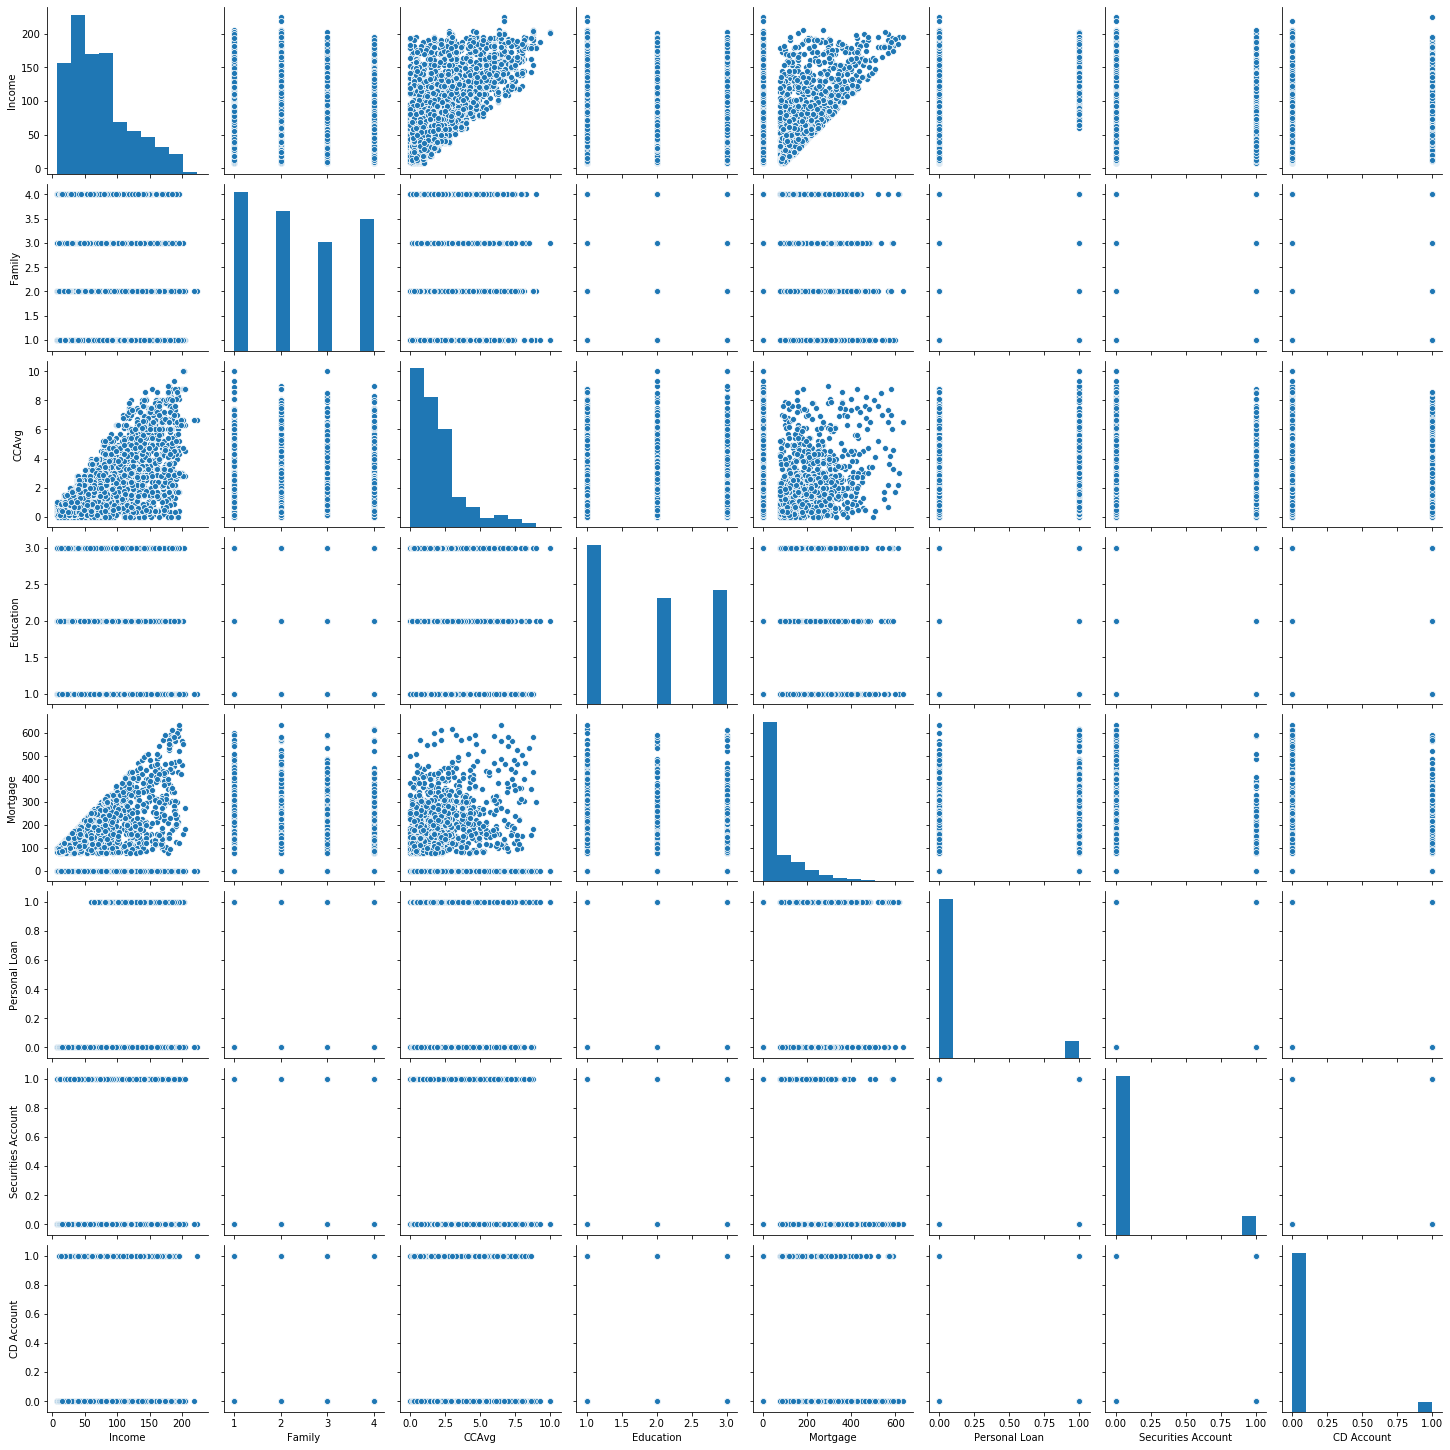

In [23]:
pl_pairing = loan.drop(['ID','Age','Experience','ZIP Code','Online','CreditCard'], axis = 1)
sns.pairplot(pl_pairing)

## Modelling

In [24]:
loan.drop(['ID','Age','Experience','ZIP Code','Online','CreditCard'], axis = 1, inplace = True)
loan.columns

Index(['Income', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Personal Loan',
       'Securities Account', 'CD Account'],
      dtype='object')

In [25]:
# getting the feature columns(x) and the target column(y)

x = loan.drop('Personal Loan', axis = 1)
y = loan['Personal Loan']

display(x.shape, y.shape)

(5000, 7)

(5000,)

## Splitting the data into training data set and testing data set. We will Split them in the following ratio:

- Training Set 70%
- Testing Set 30%

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state = 1)

In [28]:
display(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(3500, 7)

(1500, 7)

(3500,)

(1500,)

In [29]:
print("{0:0.2f}% data is in training set".format((len(x_train)/len(loan.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(loan.index)) * 100))

70.00% data is in training set
30.00% data is in test set


## Applying Logistic Regression to the model:

In [30]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

In [31]:
# Fit the model on train
model = LogisticRegression(solver="liblinear")
model.fit(x_train, y_train)
#predict on test
y_predict = model.predict(x_test)


coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

          0         1         2         3         4         5         6  \
0  0.040373  0.456775  0.132637  1.180473  0.000612 -0.711177  2.231736   

   intercept  
0  -10.44203  


In [32]:
model_score = model.score(x_test, y_test)
print(model_score)

0.946


## Confusion Matrix for Logistic Regression model:

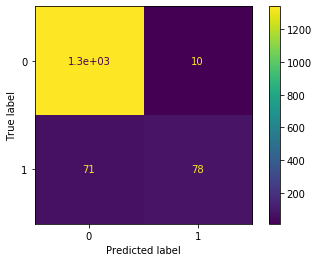

In [33]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model,x_test,y_test)

## Classification report for Logistic Regression Model:

In [34]:
print("Classification Report")
print(metrics.classification_report(y_test, y_predict, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.89      0.52      0.66       149
           0       0.95      0.99      0.97      1351

    accuracy                           0.95      1500
   macro avg       0.92      0.76      0.81      1500
weighted avg       0.94      0.95      0.94      1500



## Applying K-NN Classifier to the model:

In [35]:
from sklearn.neighbors import KNeighborsClassifier
x = loan.drop('Personal Loan', axis = 1)
y = loan['Personal Loan']

display(x.shape, y.shape)

(5000, 7)

(5000,)

In [36]:
from scipy.stats import zscore
XScaled  = x.apply(zscore)  # convert all attributes to Z scale 
XScaled.describe()

,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account
count,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03
mean,1.939449e-16,7.850609e-16,-2.078338e-17,-6.315837e-16,2.810197e-16,5.092149e-16,4.426903e-16
std,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00
min,-1.428969e+00,-1.216855e+00,-1.108987e+00,-1.049078e+00,-5.555239e-01,-3.414233e-01,-2.535403e-01
25%,-7.554825e-01,-1.216855e+00,-7.084116e-01,-1.049078e+00,-5.555239e-01,-3.414233e-01,-2.535403e-01
50%,-2.123482e-01,-3.454321e-01,-2.506106e-01,1.417029e-01,-5.555239e-01,-3.414233e-01,-2.535403e-01
75%,5.263146e-01,5.259909e-01,3.216407e-01,1.332484e+00,4.375576e-01,-3.414233e-01,-2.535403e-01
max,3.263712e+00,1.397414e+00,4.613525e+00,1.332484e+00,5.688108e+00,2.928915e+00,3.944146e+00


In [37]:
x_train, x_test, y_train, y_test = train_test_split(XScaled, y, test_size=0.30, random_state=1)

In [38]:
display(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(3500, 7)

(1500, 7)

(3500,)

(1500,)

In [39]:
NNH = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )
NNH.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

In [40]:
predicted_labels = NNH.predict(x_test)
NNH.score(x_test, y_test)

0.9673333333333334

## Confusion Matrix for K-NN Model:

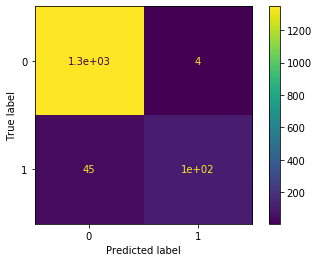

In [41]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(NNH,x_test,y_test)

## Classification Report for K-NN Model:

In [42]:
print("Classification Report")
print(metrics.classification_report(y_test, predicted_labels, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.96      0.70      0.81       149
           0       0.97      1.00      0.98      1351

    accuracy                           0.97      1500
   macro avg       0.97      0.85      0.90      1500
weighted avg       0.97      0.97      0.96      1500



## Applying Naive Bayes (Gaussian) to the model:

In [43]:
from sklearn.naive_bayes import GaussianNB
x = loan.drop('Personal Loan', axis = 1)
y = loan['Personal Loan']

display(x.shape, y.shape)

(5000, 7)

(5000,)

In [44]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state = 1)
display(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(3500, 7)

(1500, 7)

(3500,)

(1500,)

In [45]:
nb_model = GaussianNB()

nb_model.fit(x_train, y_train.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)

In [46]:
nb_train_predict = nb_model.predict(x_train)

from sklearn import metrics

print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, nb_train_predict)))
print()

Model Accuracy: 0.8897



In [47]:
nb_test_predict = nb_model.predict(x_test)


print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, nb_test_predict)))
print()

Model Accuracy: 0.8753



## Confusion Matrix for Naive Bayes Model:

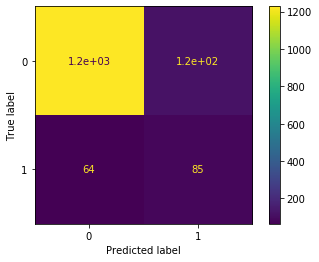

In [48]:
plot_confusion_matrix(nb_model,x_test,y_test)

## Classification Report for Naive Bayes Model:

In [49]:
print("Classification Report")
print(metrics.classification_report(y_test, nb_test_predict, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.41      0.57      0.48       149
           0       0.95      0.91      0.93      1351

    accuracy                           0.88      1500
   macro avg       0.68      0.74      0.70      1500
weighted avg       0.90      0.88      0.88      1500



## For Predicting the conversion to personal loan, the best model to use is the K-NN Classifier, due to the following reasons:

- Non-parametric algorithm which means there are no assumptions to be met to implement k-NN. 
- Parametric models like logistic regression has lots of assumptions to be met by data before it can be implemented which is not the case with k-NN.
- k-NN is a memory-based approach that is the classifier immediately adapts as we collect new training data. It allows the algorithm to respond quickly to changes in the input during real-time use.

## From the above confusion matrix and classification report we can see the following numbers for K-NN model:

- Recall (class 1): 70% 
- f1-score (class 1): 81% 
- Accuracy Score: 97% 

## Where as for Logistic Regression we got the following numbers:

- Recall (class 1): 52% 
- f1-score (class 1): 66% 
- Accuracy Score: 95%

## And for Naive Baye's Classifier we got the following numbers:

- Recall (class 1): 57% 
- f1-score (class 1): 48% 
- Accuracy Score: 88%

